## *Exploring the mean differences for subjects whitin tasks*

* First extract the mean alpha power for each subject in each condition
* Calculate the difference between corresponding tasks and states
* print out the difference

In [1]:
import numpy as np

from eeg_analyzer.dataset import Dataset
from utils.config import DATASETS

dataset_config = DATASETS['touryan2022']
dataset = Dataset(dataset_config)
dataset.load_subjects()

session_id = 2

# Extract the mean alpha power for each subject in each condition (also within channel)
touryan_alpha_powers = dataset.get_mean_alpha_diff_by_condition(session_id)

for subj_id, alpha_power in touryan_alpha_powers.items():
    print(f"Subject ID: {subj_id}, Alpha Power Difference: {alpha_power}")


Subject ID: 01, Alpha Power Difference: {'collision': array([  1.04749804,  -0.92306864,  -0.93088763,  -1.26562952,
        -0.57947784,  -1.00506785,   0.06580216,  -2.00266533,
        -1.80264961,   0.20872967,   0.24219837,   0.19593049,
         2.76059188,   2.54433803,  -6.17460654, -13.62246321,
         2.03780758,   6.60403603,   0.2353928 ,   0.46390264,
         2.7307124 ,   0.2679714 ,  -2.70182914,  -5.11306478,
         0.91073055,  -1.3448956 ,   1.43491072,   2.36415021,
         2.79498681,  -0.82643901,  -0.91438981,  -1.88473761,
         0.06928767,  -0.09499891,   0.42397262,   0.343577  ,
        -0.44539934,  -0.82010791,  -0.49702429,   0.82133516,
         2.61897533,   2.18732319,   1.61503711,   3.40137619,
         1.47939599,  -0.92238006,   1.89592139,  -3.1110329 ,
        -0.75897744,   4.38655944,   6.04437966,   2.56364803,
         3.11272911,   2.22302116,   3.24230051,  -0.06349225,
        -1.48737997,   0.04903632,   1.32218124,   3.85577623,
 

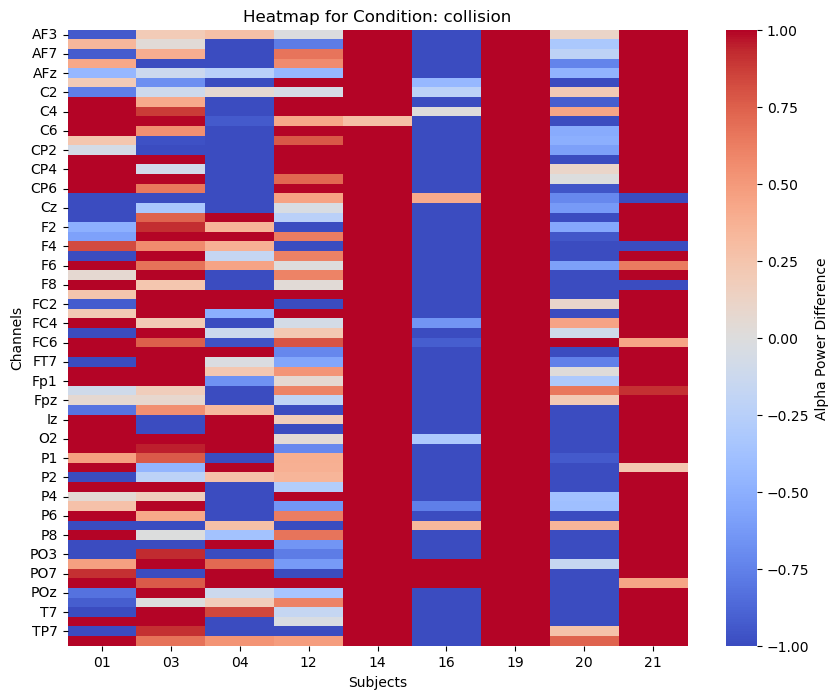

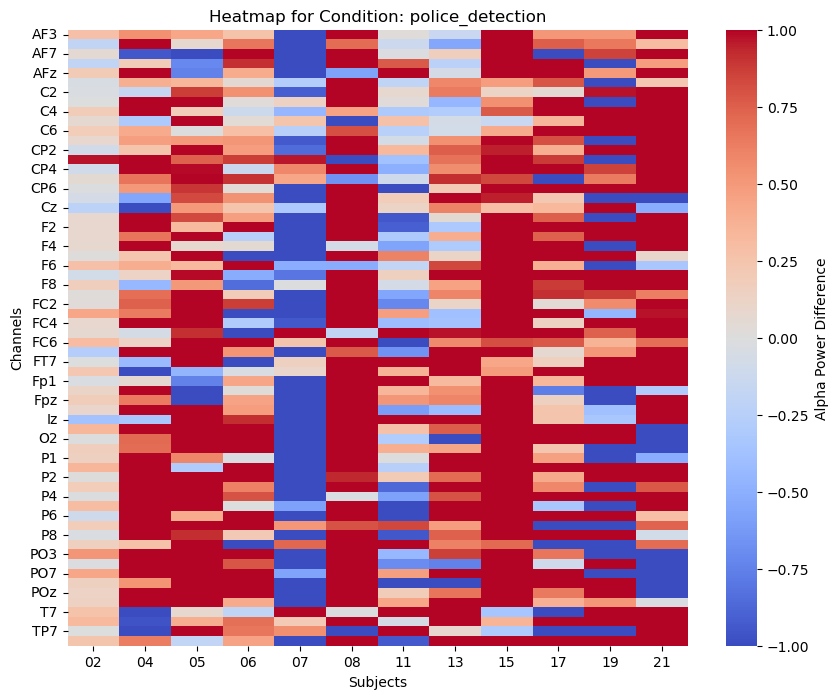

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get channel names
channel_names = dataset.get_channel_names()

# Convert touryan_alpha_powers to a DataFrame
alpha_df = pd.DataFrame([
    {"Subject": subj_id, "Condition": condition, "Channel": channel, "AlphaDiff": alpha_diff}
    for subj_id, conditions in touryan_alpha_powers.items()
    for condition, alpha_diffs in conditions.items()
    for channel, alpha_diff in zip(channel_names, alpha_diffs)
])

# Clip extreme values to mitigate the effect of outliers
clip_threshold = 1  # Define a threshold for clipping
alpha_df["AlphaDiff"] = alpha_df["AlphaDiff"].clip(lower=-clip_threshold, upper=clip_threshold)

# Group by condition and plot heatmaps
for condition_name, group in alpha_df.groupby("Condition"):
    heatmap_data = group.pivot(index="Channel", columns="Subject", values="AlphaDiff")
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        data=heatmap_data,
        cmap="coolwarm",
        center=0,  # Center the color map at 0
        cbar_kws={'label': 'Alpha Power Difference'}
    )
    plt.title(f"Heatmap for Condition: {condition_name}")
    plt.ylabel("Channels")
    plt.xlabel("Subjects")
    plt.show()